# `numpy` practice

In [1]:
import numpy as np

1. Do numpy exercises 6, 8, 9 and 19.

1. numpy exercise 44.

1. A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an $x$-$y$ plane for several values of $a$. (Hint: `np.linspace` creates a linearly spaced array of values)

2. A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).

3. Given two arrays, `u` and `v`, construct the Cauchy matrix using 1) explicit broadcasting, and 2) `subtract.outer` attribute.

4. See "Monte Carlo Error propagation" (separate html)

N. Rougier, *Numpy 100 excercises*, https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_no_solution.md

#### 6. Create a null vector of size 10 but the fifth value which is 1 (★☆☆)

In [2]:
# obvious variant
arr = np.zeros(10)
arr[4] = 1
arr

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [3]:
# one-line variant (funny)
np.array(list('1'.center(10, '0')), dtype=float)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

#### 8. Reverse a vector (first element becomes last) (★☆☆)

In [4]:
# obvious variant
arr = np.arange(10)
arr[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [5]:
# in-place variant, const memory consumption
mid_idx = arr.shape[0] // 2
for step_idx in range(1, mid_idx):
    arr[mid_idx + step_idx], arr[mid_idx - step_idx - 1] = arr[mid_idx - step_idx - 1], arr[mid_idx + step_idx]

arr

array([9, 8, 7, 6, 4, 5, 3, 2, 1, 0])

#### 9. Create a 3x3 matrix with values ranging from 0 to 8 (★☆☆)

In [6]:
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

#### 19. Create a 8x8 matrix and fill it with a checkerboard pattern (★☆☆)

In [7]:
arr = np.ones((8,8))
arr[::2,::2] = 0
arr[1::2,1::2] = 0
arr

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

#### 44. Consider a random 10x2 matrix representing cartesian coordinates, convert them to polar coordinates (★★☆)

In [8]:
arr = np.random.random((10,2))
xs, ys = arr[:,0], arr[:,1]
a = np.sqrt(xs**2 + xs**2)
b = np.arctan2(ys, xs)
a, b

(array([0.89142681, 1.00200695, 1.1935757 , 0.67760592, 1.06898171,
        0.55312314, 0.22008492, 0.17956775, 0.22325291, 0.02188733]),
 array([0.81963247, 0.93246025, 0.59108441, 1.00743282, 0.80169546,
        0.1057897 , 1.00386376, 1.19864347, 1.40221972, 1.54541774]))

### A snail curve is defined by the following equation in polar coordinates: $r = a + \cos\phi$. Plot the curve on an  𝑥 - 𝑦  plane for several values of  𝑎 . (Hint: np.linspace creates a linearly spaced array of values)

In [9]:
import matplotlib.colors as mcolors
from collections import deque
available_colors = deque(
    np.random.permutation(list(mcolors.CSS4_COLORS.keys()))
)

In [10]:
import matplotlib.pyplot as plt
import itertools
import operator
%matplotlib inline

import numpy as np

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return rho, phi

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return x, y

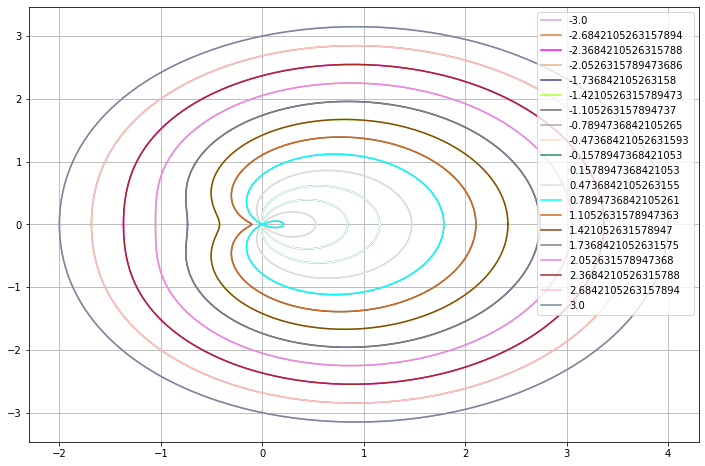

In [11]:
phi_arr = np.linspace(0,2*np.pi, 300)
a_arr = np.linspace(-3, 3, 20)
available_colors = deque(
    np.random.permutation(list(mcolors.CSS4_COLORS.keys()))
)
fig, ax = plt.subplots(figsize=(12,8))
for label, coords in itertools.groupby(itertools.product(a_arr, phi_arr), operator.itemgetter(0)):
    
    xs, ys = zip(*[pol2cart(a + np.cos(phi), phi) for a, phi in coords])
    
    ax.plot(xs,ys, c=available_colors.popleft(), label=label)

ax.legend()
ax.grid(True)

####  A *cochleoid* curve is defined by the following equation in polar coordinates: $r = a \dfrac{\sin\phi} {\phi }$. Plot the curve on an $x$-$y$ plane. (This time, use `np.where` to work around division by zero).


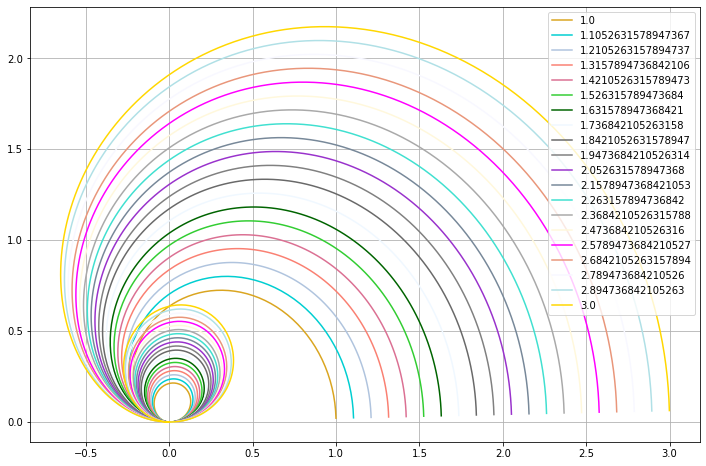

In [12]:
phi_arr = np.linspace(0,2*np.pi, 300)
phi_arr = phi_arr[np.nonzero(phi_arr)]
a_arr = np.linspace(1, 3, 20)
available_colors = deque(
    np.random.permutation(list(mcolors.CSS4_COLORS.keys()))
)
fig, ax = plt.subplots(figsize=(12,8))
for label, coords in itertools.groupby(itertools.product(a_arr, phi_arr), operator.itemgetter(0)):
    
    xs, ys = zip(*[pol2cart(a * (np.sin(phi)/phi) , phi) for a, phi in coords])
    
    ax.plot(xs,ys, c=available_colors.popleft(), label=label)

ax.legend()
ax.grid(True)

#### Given two arrays, u and v, construct the Cauchy matrix using 1) explicit broadcasting, and 2) subtract.outer attribute.

In [42]:
np.set_printoptions(precision=3)

u = np.random.randint(1, 10, size=10)
v = np.random.randint(1, 10, size=10)


In [43]:
v

array([8, 9, 8, 3, 1, 8, 3, 9, 5, 3])

In [44]:
u

array([6, 2, 3, 2, 7, 3, 5, 7, 6, 9])

In [94]:
denominator = (v.reshape(10,1) - u.reshape(1,10))
denominator[denominator == 0] = 1 # avoid Zero division
cauchy = 1/denominator

cauchy

array([[ 0.5  ,  0.167,  0.2  ,  0.167,  1.   ,  0.2  ,  0.333,  1.   ,
         0.5  , -1.   ],
       [ 0.333,  0.143,  0.167,  0.143,  0.5  ,  0.167,  0.25 ,  0.5  ,
         0.333,  1.   ],
       [ 0.5  ,  0.167,  0.2  ,  0.167,  1.   ,  0.2  ,  0.333,  1.   ,
         0.5  , -1.   ],
       [-0.333,  1.   ,  1.   ,  1.   , -0.25 ,  1.   , -0.5  , -0.25 ,
        -0.333, -0.167],
       [-0.2  , -1.   , -0.5  , -1.   , -0.167, -0.5  , -0.25 , -0.167,
        -0.2  , -0.125],
       [ 0.5  ,  0.167,  0.2  ,  0.167,  1.   ,  0.2  ,  0.333,  1.   ,
         0.5  , -1.   ],
       [-0.333,  1.   ,  1.   ,  1.   , -0.25 ,  1.   , -0.5  , -0.25 ,
        -0.333, -0.167],
       [ 0.333,  0.143,  0.167,  0.143,  0.5  ,  0.167,  0.25 ,  0.5  ,
         0.333,  1.   ],
       [-1.   ,  0.333,  0.5  ,  0.333, -0.5  ,  0.5  ,  1.   , -0.5  ,
        -1.   , -0.25 ],
       [-0.333,  1.   ,  1.   ,  1.   , -0.25 ,  1.   , -0.5  , -0.25 ,
        -0.333, -0.167]])

In [98]:
denominator = np.subtract.outer(v, u)
denominator[denominator == 0] = 1 # avoid Zero division
cauchy = 1/denominator

cauchy

array([[ 0.5  ,  0.167,  0.2  ,  0.167,  1.   ,  0.2  ,  0.333,  1.   ,
         0.5  , -1.   ],
       [ 0.333,  0.143,  0.167,  0.143,  0.5  ,  0.167,  0.25 ,  0.5  ,
         0.333,  1.   ],
       [ 0.5  ,  0.167,  0.2  ,  0.167,  1.   ,  0.2  ,  0.333,  1.   ,
         0.5  , -1.   ],
       [-0.333,  1.   ,  1.   ,  1.   , -0.25 ,  1.   , -0.5  , -0.25 ,
        -0.333, -0.167],
       [-0.2  , -1.   , -0.5  , -1.   , -0.167, -0.5  , -0.25 , -0.167,
        -0.2  , -0.125],
       [ 0.5  ,  0.167,  0.2  ,  0.167,  1.   ,  0.2  ,  0.333,  1.   ,
         0.5  , -1.   ],
       [-0.333,  1.   ,  1.   ,  1.   , -0.25 ,  1.   , -0.5  , -0.25 ,
        -0.333, -0.167],
       [ 0.333,  0.143,  0.167,  0.143,  0.5  ,  0.167,  0.25 ,  0.5  ,
         0.333,  1.   ],
       [-1.   ,  0.333,  0.5  ,  0.333, -0.5  ,  0.5  ,  1.   , -0.5  ,
        -1.   , -0.25 ],
       [-0.333,  1.   ,  1.   ,  1.   , -0.25 ,  1.   , -0.5  , -0.25 ,
        -0.333, -0.167]])